# Busqueda por Amplitud

A continuacion se ejemplifica la busqueda por amplitud revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano.
<h2><center> Universidad "Politecnica Salesiana" </center></h2>
<h5><right>Alumno: Juan Cañar. <br> Docente: Ing. Diego Quisi. </right></h5>

In [24]:
# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [62]:
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
        'Latacunga': {'Ambato', 'Quito'},
        'Esmeraldas': {'Manta'},
        'Manta': {'Guayaquil'},
        'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
        'Riobamba': {'Cuenca', 'Quito'},
        'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
        'Puyo': {'Ambato', 'Quito'},
        'Machala': {'Guayaquil'},
        'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'}
    }

    init_state = 'Cuenca'
    solution = 'Ambato'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")

['Cuenca', 'Guayaquil', 'Ambato']


# Tarea: Cálculo del factor de ramificación
Realice el cálculo del factor de ramificación del problema de las N reinas (con N = 4). Para ello deberá realizar las siguientes actividades:

Asumir que el factor de ramificación es constante.
Despejar el valor de b
Consultar sitios externos sobre cómo realizar el cálculo

<h2><center>Calculo Factor de ramificacion</center></h2>

**Factor de ramificacion**
- - -
   * El factor de ramificacion de un nodo es el numero de sus sucesores, se define como el factor de      ramificacion de un arbol con el factor cosntante de ramificacion, igual profundidad, e igual n.
    #### * "b" maximo factor de ramificacion de la busqueda ####
    #### * "d" profundidad de la solucion de menor coste ####
    #### * "n" maxima profundidad del espacio de estados "Puede ser infinita" ####

**Resolucion**
- - - - - - - -
<h1>Formula</h1>

\begin{equation*}
n =
\frac{b^{d+1} -1} {b-1}
\end{equation*}

##### Total de posiciones: 2^4=16  #####
\begin{equation*}
b =
\frac{4^{2}} {}{=16}
\end{equation*}
##### Total de nodos n=4 #####
##### b=? #####

<h1>Desarrollo</h1>    

\begin{equation} \label{eq1}
\begin{split}
n & = \frac{b^{d+1}-1}{b-1} \\
 \end{split}
\end{equation}


\begin{equation*}
b =
\frac{n} {d}
\end{equation*}

\begin{equation*}
b =
\frac{{4}} {16}
\end{equation*}

\begin{equation*}
b =
\frac{{1}} {4}{=0,25}
\end{equation*}



#### Calculo del factor de ramificacion, con el factor de ramificacion constante

In [26]:
import math
n = 4
d = pow(pow(n,1),2)
b = ((math.ceil(n))/(math.ceil(d)))
print("Factor de ramificación = ", str(b))

Factor de ramificación =  0.25


## Practica

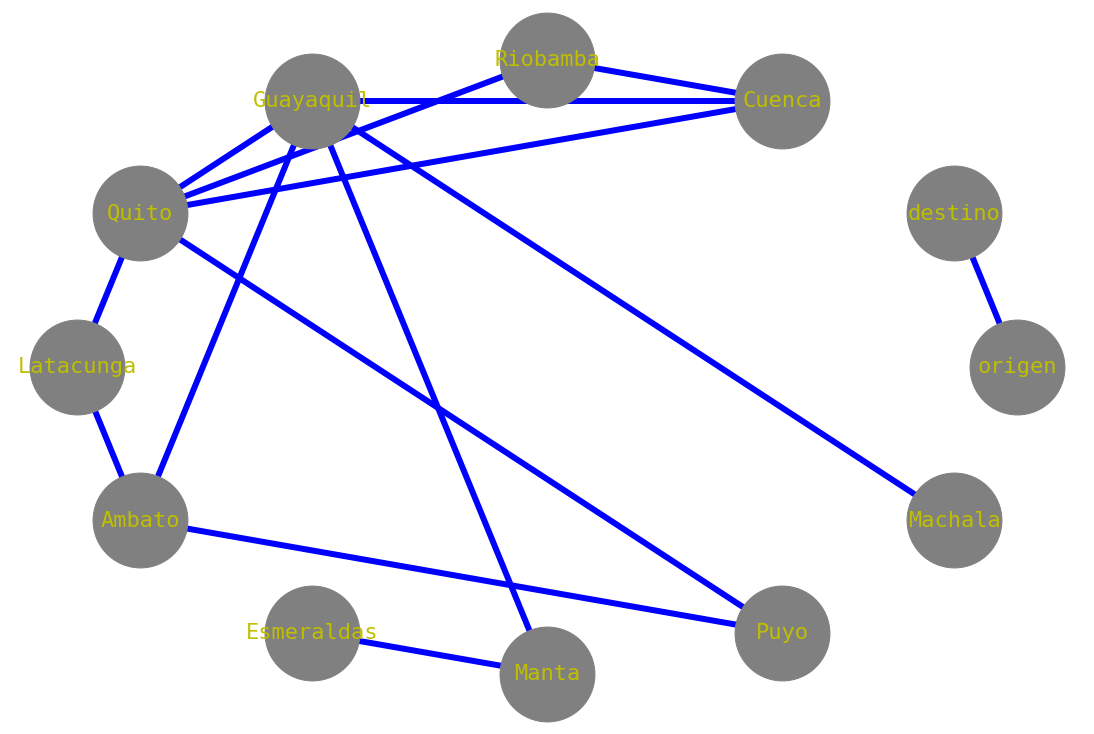

In [67]:
import csv
from os import remove
import networkx as nx
import pandas as pd

from IPython.display import HTML

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

connections = {
    'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
    'Latacunga': {'Ambato', 'Quito'},
    'Esmeraldas': {'Manta'},
    'Manta': {'Guayaquil'},
    'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
    'Riobamba': {'Cuenca', 'Quito'},
    'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
    'Puyo': {'Ambato', 'Quito'},
    'Machala': {'Guayaquil'},
    'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'},
}
lista = []
lista.append('origen')
lista.append('destino')

#Metodo llenar las coenciones en lista
def itemsLlave(nombreLlave,llave):
        listaV = connections[llave]
        for i in listaV:
                lista.append(nombreLlave)
                lista.append(i)

def datosCSV(lista):
    file = open("archivo.csv", "a")
    spamreader = csv.writer(file)
    spamreader.writerow(lista)
    file.close()
    
    
for k, i in connections.items():
       itemsLlave(k,k)


    
lista_nueva = []
x = 0
cont = 0
valDividir = False
while x < len(lista):
    if cont== 2:
            datosCSV(lista_nueva)
            cont = 0
            lista_nueva = []
    if cont != 2:
        lista_nueva.append(lista[x])
        cont=cont+1

    x=x+1

listCiudades = pd.read_csv("archivo.csv", encoding="ISO-8859–1")
gf=nx.Graph()
for row in listCiudades.iterrows():
    gf.add_edge(row[1]["origen"],
                row[1]["destino"])
nx.draw_circular(gf,
        font_color='y',
        font_family='monospace',
        node_color="grey",
        edge_color="blue",
        font_size=22,
        width=6, 
        with_labels=True, 
        node_size=9000,
)
remove("archivo.csv")

#### Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


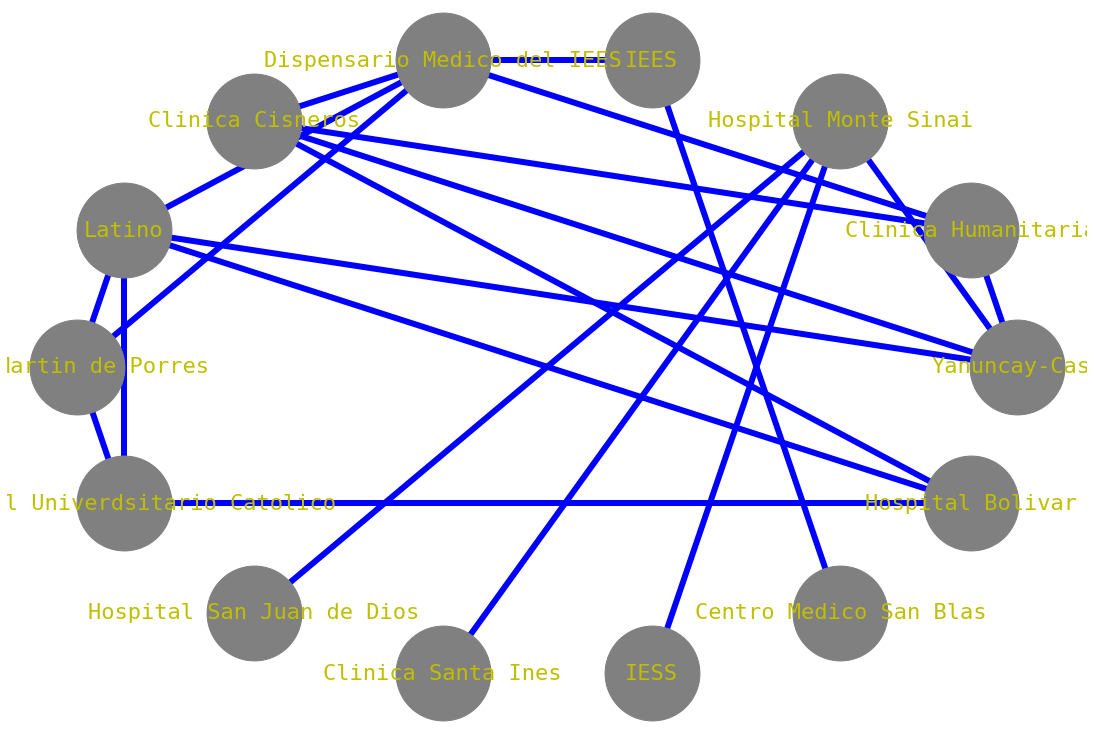

In [119]:
connections = {
        'Yanuncay-Casa': {'Hospital Monte Sinai','Latino','Clinica Cisneros'},
        'Clinica Humanitaria' : {'Yanuncay-Casa', 'Dispensario Medico del IEES'},
        'Hospital Monte Sinai': {'Yanuncay-Casa','Hospital San Juan de Dios','Clinica Santa Ines', 'IESS'},
        'IEES': {'Centro Medico San Blas', 'Dispensario Medico del IEES'},
        'Dispensario Medico del IEES': {'Latino','Clinica Cisneros'},
        'Clinica Cisneros': {'Clinica Humanitaria','Hospital Bolivar'},
        'Latino': {'Hospital Bolivar', 'San Martin de Porres' , 'Hospital Univerdsitario Catolico'},
        'San Martin de Porres' : {'Dispensario Medico del IEES'},
        'Hospital Univerdsitario Catolico' : {'Hospital Bolivar', 'San Martin de Porres' , 'Latino'}
}
# Implementar
#Imports
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

g = nx.Graph(connections)
nx.draw_circular(g,
        font_color='y',
        font_family='monospace',
        node_color="grey",
        edge_color="blue",
        font_size=22,
        width=6, 
        with_labels=True, 
        node_size=9000,
)


#### Ruta desde la casa

['Yanuncay-Casa', 'Latino', 'San Martin de Porres']
['Yanuncay-Casa', 'Latino', 'San Martin de Porres']


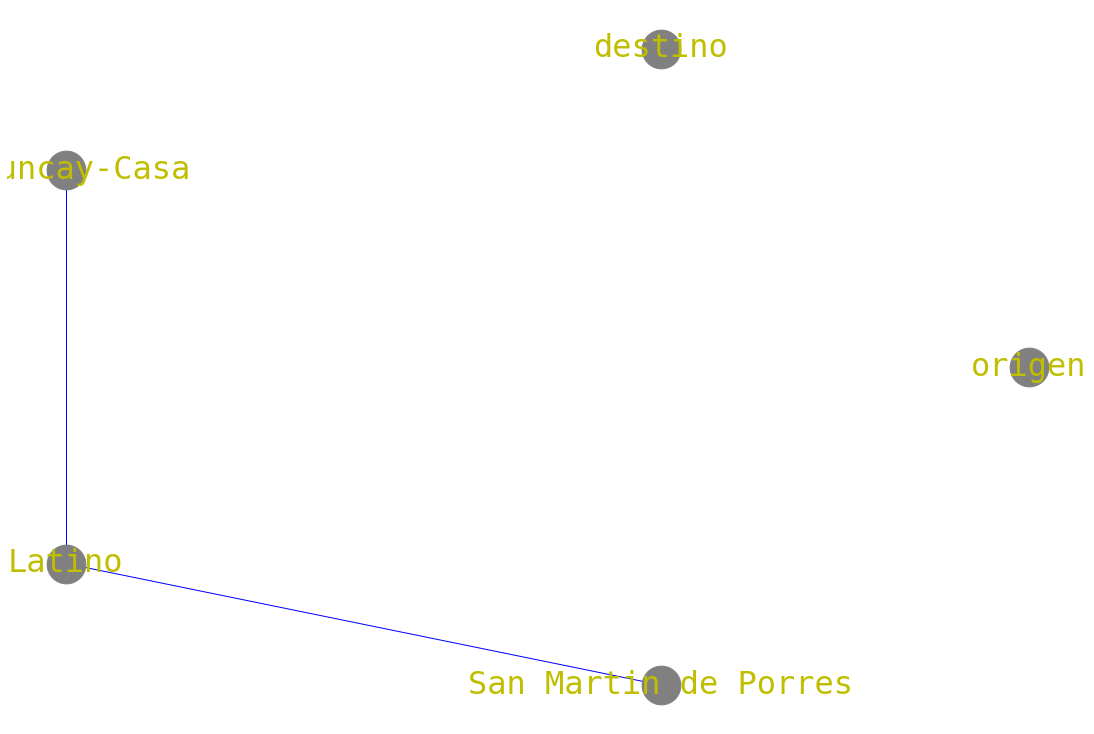

In [118]:
if __name__ == "__main__":
    connections = {
        'Yanuncay-Casa': {'Hospital Monte Sinai','Latino','Clinica Cisneros'},
        'Clinica Humanitaria' : {'Yanuncay-Casa', 'Dispensario Medico del IEES'},
        'Hospital Monte Sinai': {'Yanuncay-Casa','Hospital San Juan de Dios','Clinica Santa Ines', 'IESS'},
        'IEES': {'Centro Medico San Blas', 'Dispensario Medico del IEES'},
        'Dispensario Medico del IEES': {'Latino','Clinica Cisneros'},
        'Clinica Cisneros': {'Clinica Humanitaria','Hospital Bolivar'},
        'Latino': {'Hospital Bolivar', 'San Martin de Porres' , 'Hospital Univerdsitario Catolico'},
        'San Martin de Porres' : {'Dispensario Medico del IEES'},
        'Hospital Univerdsitario Catolico' : {'Hospital Bolivar', 'San Martin de Porres' , 'Latino'}
}
    init_state = 'Yanuncay-Casa'
    solution = 'San Martin de Porres'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("Ruta no encontrada")

    lista1 = []
lista1.append('origen')
lista1.append('destino')
file = open("archivo.csv", "a")
spamreader = csv.writer(file)
spamreader.writerow(lista1)
file.close()


lista_nueva = []
x = 0
cont = 0
while x < len(result):
    if cont != 2:
        lista_nueva.append(result[x])
        cont = cont + 1

    if cont == 2:
        datosCSV(lista_nueva)
        cont = 0
        lista_nueva = []
        x = x -1

    x = x + 1
    
sol_lista = pd.read_csv("archivo.csv")
g=nx.Graph()

g.add_nodes_from(sol_lista)
for row in sol_lista.iterrows():
    g.add_edge(row[1][0],
               row[1][1])
nx.draw_circular(g,
        font_color='y',
        font_family='monospace',
        node_color="grey",
        edge_color="blue",
        font_size=32,
        width_node=66, 
        with_labels=True, 
        node_size=1500,)    

print(result)


### Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.

##### Resolucion
 n= 4
 d= 14
 
**Calculo**

14/4=3.5

 ##### Completitud
*Se puede decir que el algoritmo es completo ya que busca desde la raiz o nod principal, hasta allar la solucion
 ##### optimalidad
*Es optimo porque devuelve la tura mas cercana a el punto raiz, a menor costo
  
 ##### Complejidad temporal

\begin{equation*}
O =
\frac{(b^{n})}{}
\end{equation*}

\begin{equation*}
O =
\frac{(3.5^{14})}{ } {= 41}
\end{equation*}

  
 ##### Complejidad espacial
 
\begin{equation*}
O =
\frac{(b {}*n)}{} { = 41 *3.5}
\end{equation*}


\begin{equation*}
O =
\frac{}{} { 143.5}
\end{equation*}

# Conclusiones

Se puede concluir que en esta practica entendimos como realizar el calculo y la busqueda mediante amplitud, ademas de reflejar que se considera el costo del camino en saltos utilizando el lenguaje de programacion python.

